<a href="https://colab.research.google.com/github/joshfpedro/math-328/blob/main/assignment_1_guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Optional: Configure matplotlib for better-looking plots in Colab
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

In [20]:
import numpy as np
import matplotlib.pyplot as plt


def bisection(f, a, b, tol=1e-6, max_iter=100):
    """Find root using bisection method."""

    # Step 1: Check that signs differ
    if f(a) * f(b) > 0:
        raise ValueError("f(a) and f(b) must have opposite signs")

    # Step 2: Initialize
    history = []
    iteration = 0

    # Step 3: Main loop
    while iteration < max_iter:
        c = (a + b) / 2
        history.append(c)

        if abs(f(c)) < tol or abs(b - a) / 2 < tol:
            return c, iteration + 1, history

        # Update interval
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c

        iteration += 1

    # Step 4: Return even if not converged
    return c, iteration, history

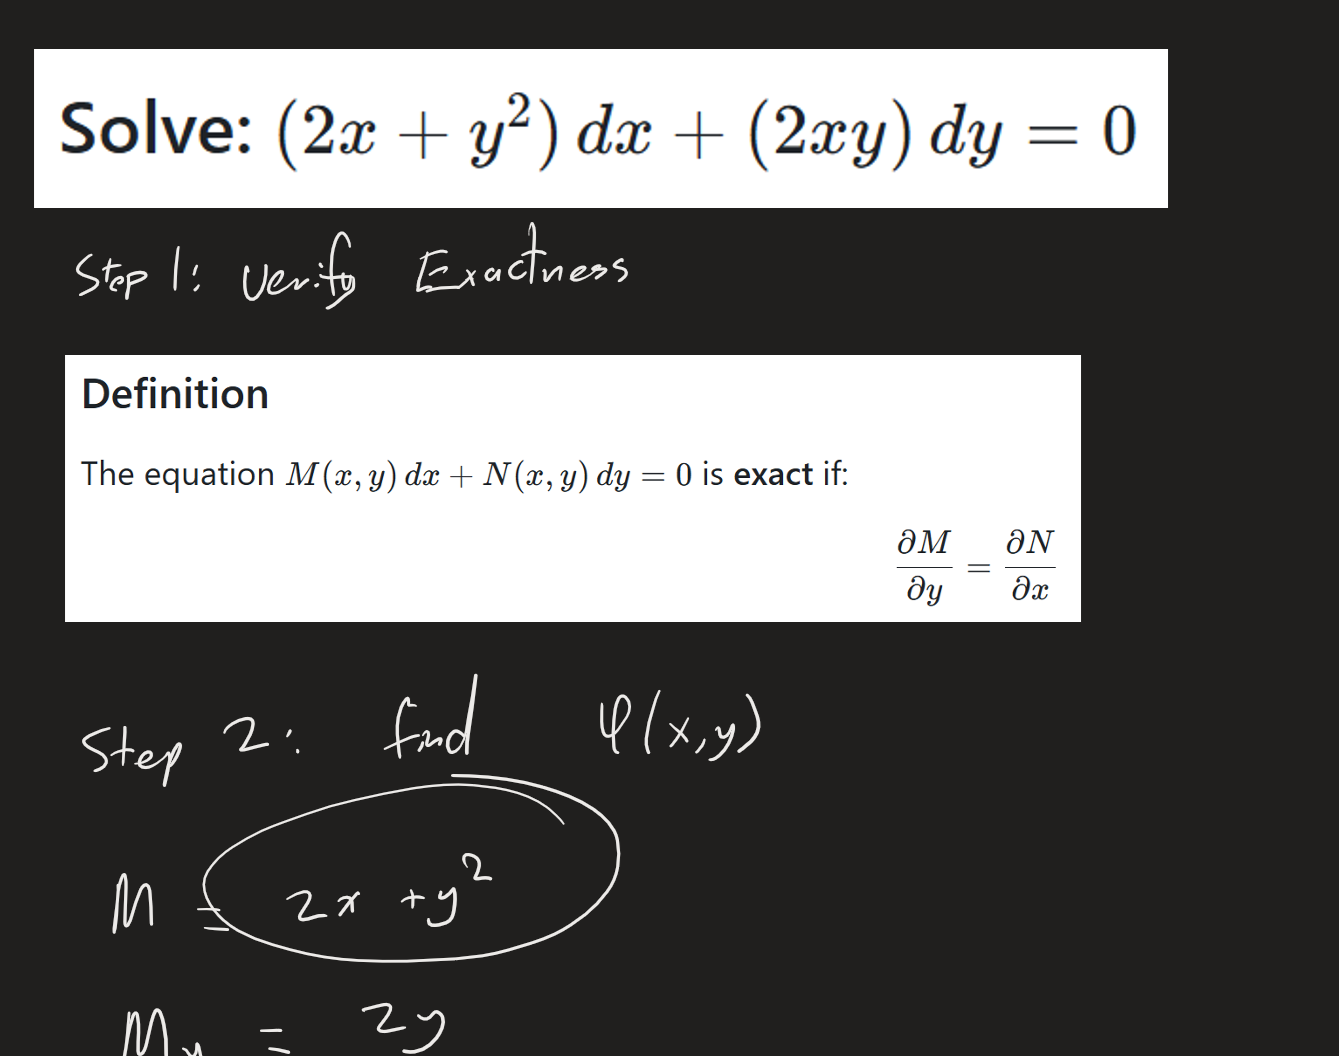

In [21]:
# Test 1: Simple case with known answer
f = lambda x: x**2 - 4  # Root at x = 2
root, iters, hist = bisection(f, 0, 3)

print(f"Root found: {root:.6f}")
print(f"Expected: 2.0")
print(f"Error: {abs(root - 2.0):.2e}")
print(f"Iterations: {iters}")

Root found: 2.000000
Expected: 2.0
Error: 2.38e-07
Iterations: 22


In [22]:
import numpy as np
import matplotlib.pyplot as plt



In [23]:
# Define test function (different from assignment)
f = lambda x: x**3 - x - 1
df = lambda x: 3*x**2 - 1  # Derivative for Newton

true_root = 1.3247179572447460  # From high-precision calculation

# Run bisection
root_bis, iters_bis, hist_bis = bisection(f, 1, 2)

# Run Newton (you'll implement this)
# root_new, iters_new, hist_new = newton(f, df, 1.5)

# Run secant (you'll implement this)
# root_sec, iters_sec, hist_sec = secant(f, 1.0, 2.0)

print(f"Bisection: {iters_bis} iterations, root = {root_bis:.10f}")

Bisection: 20 iterations, root = 1.3247175217


In [24]:
# Compute absolute error at each iteration
errors_bisection = [abs(x - true_root) for x in hist_bis]

print("Error progression (first 5 iterations):")
for i, err in enumerate(errors_bisection[:5]):
    print(f"  Iteration {i+1}: error = {err:.2e}")

Error progression (first 5 iterations):
  Iteration 1: error = 1.75e-01
  Iteration 2: error = 7.47e-02
  Iteration 3: error = 5.03e-02
  Iteration 4: error = 1.22e-02
  Iteration 5: error = 1.90e-02


In [25]:
# Convert hist_bis to numpy array so we can perform arithmetic

hist_bis = np.array(hist_bis)

error = np.abs(hist_bis - true_root)

In [26]:
log_error_ratio_list = []

for i in range(len(error) - 2):

  log_error_ratio = np.log(error[i+1]) / np.log(error[i])
  log_error_ratio_list.append(log_error_ratio)

log_error_ratio_list

[np.float64(1.4896611952070213),
 np.float64(1.152685862409145),
 np.float64(1.4731406296149612),
 np.float64(0.8993796848585327),
 np.float64(1.4342350963461408),
 np.float64(0.954768846967065),
 np.float64(1.4014034358979974),
 np.float64(0.8593887172668252),
 np.float64(1.1704686955324988),
 np.float64(1.4939182588166535),
 np.float64(0.7320801467436469),
 np.float64(1.08861423096587),
 np.float64(1.0874962733406117),
 np.float64(1.0948464510187295),
 np.float64(1.1391909818868893),
 np.float64(1.0221325111438189),
 np.float64(1.1466006712001695),
 np.float64(0.9318489026166804)]

In [27]:
error.shape

(20,)

In [28]:
len(log_error_ratio_list)

18

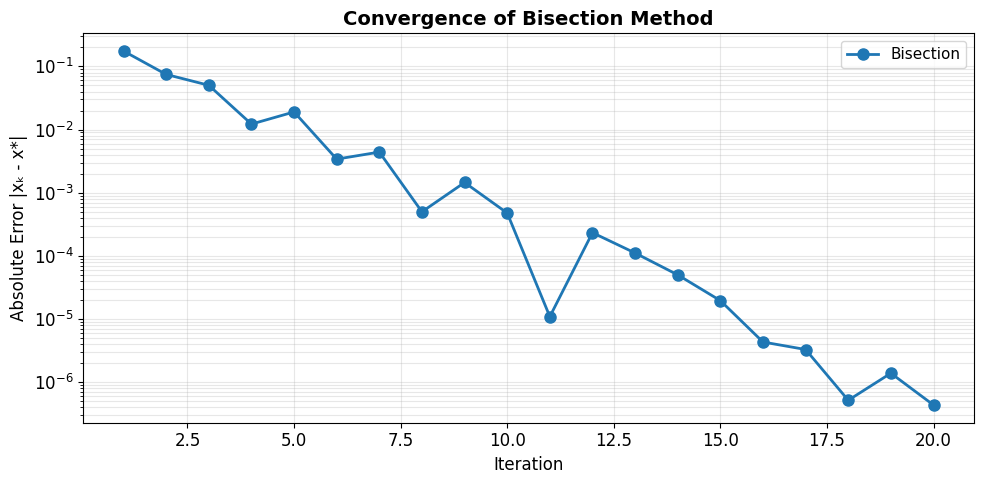

In [29]:
# Create convergence plot
fig, ax = plt.subplots(figsize=(10, 5))

iterations = range(1, len(errors_bisection) + 1)
ax.semilogy(iterations, errors_bisection, 'o-',
            linewidth=2, markersize=8, label='Bisection')

ax.set_xlabel('Iteration', fontsize=12)
ax.set_ylabel('Absolute Error |xₖ - x*|', fontsize=12)
ax.set_title('Convergence of Bisection Method', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, which='both')
ax.legend(fontsize=11)

plt.tight_layout()
plt.show()

In [30]:
def compare_convergence(f,                      #Function
                        df,                     #Derivative
                        a, b,                   #Initial values for bisection
                        x0_newton,              #Initial value for newton
                        x0_secant, x1_secant,   #Initial values for secant
                        true_root):
    """
    Compare all three methods.

    Returns
    -------
    results : dict
        Keys: 'bisection', 'newton', 'secant'
        Each contains: 'root', 'iterations', 'errors', 'final_error'
    """
    results = {}

    # Run bisection
    root, iters, hist = bisection(f, a, b)
    results['bisection'] = {
        'root': root,
        'iterations': iters,
        'errors': [abs(x - true_root) for x in hist],
        'final_error': abs(root - true_root)
    }

    # # Run Newton (similar)
    # root, iters, hist = newton(f, a, b)
    # results['bisection'] = {
    #     'root': root,
    #     'iterations': iters,
    #     'errors': [abs(x - true_root) for x in hist],
    #     'final_error': abs(root - true_root)
    # }
    # # Run Secant (similar)
    # root, iters, hist = secant(f, a, b)
    # results['bisection'] = {
    #     'root': root,
    #     'iterations': iters,
    #     'errors': [abs(x - true_root) for x in hist],
    #     'final_error': abs(root - true_root)
    # }

    return results

In [31]:
compare_convergence(f, df,
                    1, 2,     #Initial values for bisection
                    1.5,      #Initial value for Newton
                    1.0, 2.0, #Initial values for secant
                    true_root
                    )

{'bisection': {'root': 1.3247175216674805,
  'iterations': 20,
  'errors': [0.17528204275525394,
   0.07471795724474606,
   0.05028204275525394,
   0.012217957244746058,
   0.019032042755253942,
   0.0034070427552539417,
   0.004405457244746058,
   0.0004992072447460583,
   0.0014539177552539417,
   0.00047735525525394173,
   1.0925994746058265e-05,
   0.00023321463025394173,
   0.00011114431775394173,
   5.0109161503941735e-05,
   1.9591583378941735e-05,
   4.332794316441735e-06,
   3.296600214808265e-06,
   5.180970508167348e-07,
   1.3892515819957652e-06,
   4.3557726558951515e-07],
  'final_error': 4.3557726558951515e-07}}

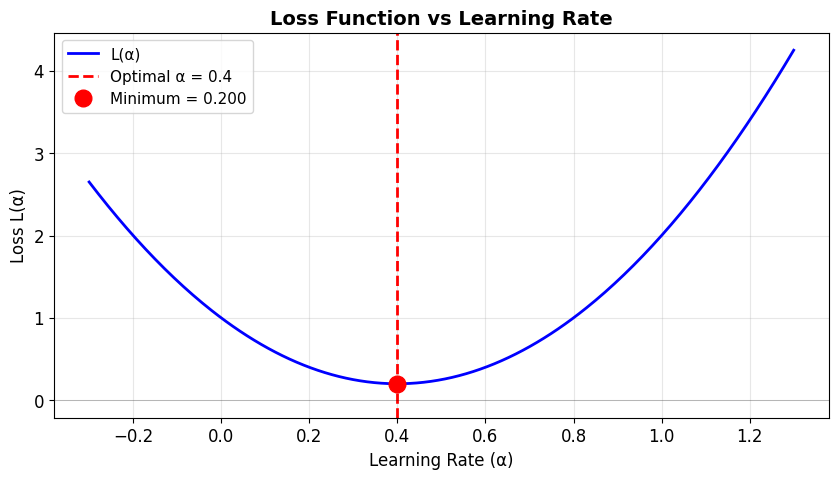

In [33]:
# Define loss function
L = lambda alpha: alpha**2 + (1 - 2*alpha)**2
dL = lambda alpha: -4 + 10*alpha

# Plot
alpha_vals = np.linspace(-0.3, 1.3, 300)
loss_vals = [L(a) for a in alpha_vals]

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(alpha_vals, loss_vals, 'b-', linewidth=2, label='L(α)')
ax.axvline(x=0.4, color='r', linestyle='--', linewidth=2, label='Optimal α = 0.4')
ax.axhline(y=0, color='k', linestyle='-', linewidth=0.5, alpha=0.3)
ax.plot(0.4, L(0.4), 'ro', markersize=12, label=f'Minimum = {L(0.4):.3f}')

ax.set_xlabel('Learning Rate (α)', fontsize=12)
ax.set_ylabel('Loss L(α)', fontsize=12)
ax.set_title('Loss Function vs Learning Rate', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.legend(fontsize=11)

plt.show()

In [34]:
# Define the derivative and its derivative
g = lambda alpha: -4 + 10*alpha  # This is L'(α)
dg = lambda alpha: 10  # This is L''(α)

# Use Newton's method to find where g(α) = 0
# root, iters, hist = newton(g, dg, x0=0.7)

# For demonstration (since newton not defined yet)
def simple_newton(f, df, x0, tol=1e-6, max_iter=20):
    x = x0
    for i in range(max_iter):
        x_new = x - f(x) / df(x)
        if abs(x_new - x) < tol:
            return x_new, i+1
        x = x_new
    return x, max_iter

optimal_alpha, iters = simple_newton(g, dg, 0.7)
print(f"Optimal learning rate: {optimal_alpha:.6f}")
print(f"Iterations needed: {iters}")
print(f"Verification: L'({optimal_alpha:.6f}) = {g(optimal_alpha):.2e}")

Optimal learning rate: 0.400000
Iterations needed: 2
Verification: L'(0.400000) = 0.00e+00


In [35]:
# We know L'(α) = -4 + 10α crosses zero in [0, 1]
# At α=0: L'(0) = -4 (negative)
# At α=1: L'(1) = 6 (positive)

root, iters, hist = bisection(g, 0, 1)
print(f"Optimal learning rate (bisection): {root:.6f}")
print(f"Iterations needed: {iters}")
print(f"True optimal: 0.4")

Optimal learning rate (bisection): 0.400001
Iterations needed: 20
True optimal: 0.4


In [ ]:
# You'll implement this
root, iters, hist = secant(g, 0.2, 0.7)
print(f"Optimal learning rate (secant): {root:.6f}")
print(f"Iterations needed: {iters}")

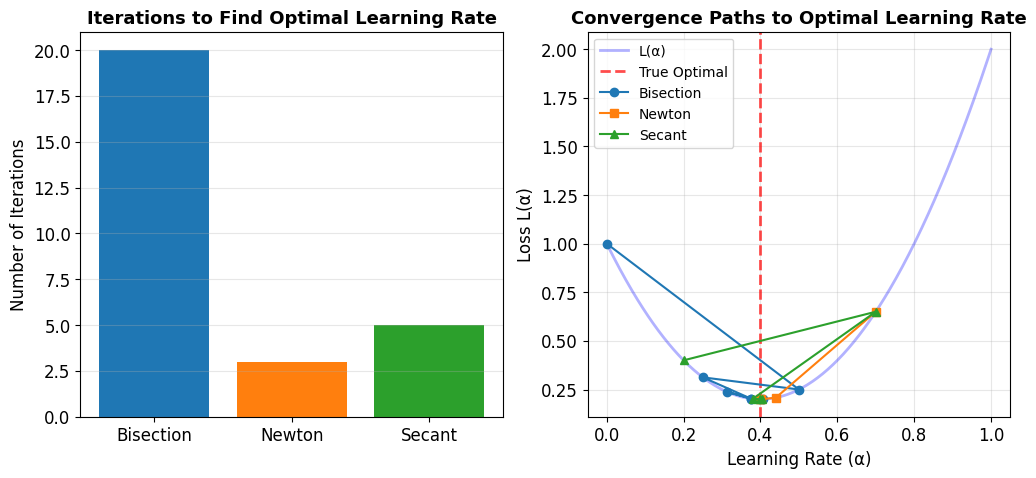

In [37]:
# Simulate all three methods (for demonstration)
methods = {
    'Bisection': 20,  # Typically needs more iterations (Manually input iterations from above results)
    'Newton': 3,      # Very fast
    'Secant': 5       # Middle ground
}

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Bar chart of iterations
ax1.bar(methods.keys(), methods.values(), color=['#1f77b4', '#ff7f0e', '#2ca02c'])
ax1.set_ylabel('Number of Iterations', fontsize=12)
ax1.set_title('Iterations to Find Optimal Learning Rate', fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='y')

# Show convergence paths on loss function
alpha_vals = np.linspace(0, 1, 300)
loss_vals = [L(a) for a in alpha_vals]

ax2.plot(alpha_vals, loss_vals, 'b-', linewidth=2, alpha=0.3, label='L(α)')
ax2.axvline(x=0.4, color='red', linestyle='--', linewidth=2,
            label='True Optimal', alpha=0.7)

# Simulate convergence paths
bisection_path = [0.0, 0.5, 0.25, 0.375, 0.3125, 0.375, 0.40625, 0.4]
newton_path = [0.7, 0.44, 0.402, 0.4]
secant_path = [0.2, 0.7, 0.38, 0.405, 0.4]

ax2.plot(bisection_path, [L(a) for a in bisection_path],
         'o-', label='Bisection', markersize=6, linewidth=1.5)
ax2.plot(newton_path, [L(a) for a in newton_path],
         's-', label='Newton', markersize=6, linewidth=1.5)
ax2.plot(secant_path, [L(a) for a in secant_path],
         '^-', label='Secant', markersize=6, linewidth=1.5)

ax2.set_xlabel('Learning Rate (α)', fontsize=12)
ax2.set_ylabel('Loss L(α)', fontsize=12)
ax2.set_title('Convergence Paths to Optimal Learning Rate', fontsize=13, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

plt.show()